# Import the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the data

In [16]:
data = pd.read_csv("/content/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


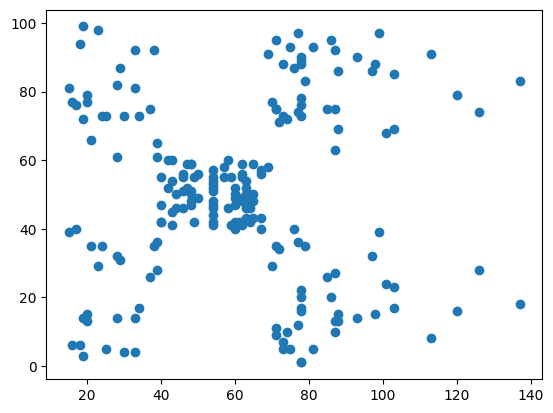

In [17]:
plt.scatter(data.iloc[:, 3:4], data.iloc[:, -1])
plt.show()

# taking the features

In [18]:
x = data.iloc[:, 3:5]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# visualize the data

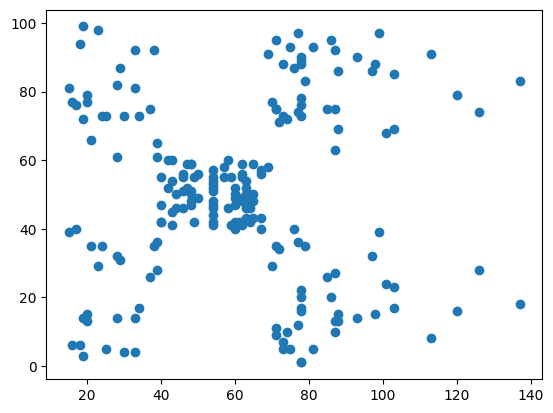

In [23]:
plt.scatter(x.iloc[:, 0:1], x.iloc[:, 1:2])

In [24]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1, 11):
    model = KMeans(n_clusters= i)
    model.fit(x)
    WCSS.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [26]:
print(WCSS)

[269981.28, 183069.17582751298, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37442.247450375704, 30566.45113025185, 25024.84445948273, 21850.165282585636, 19692.557418227763]


# selecting the right number of clusters

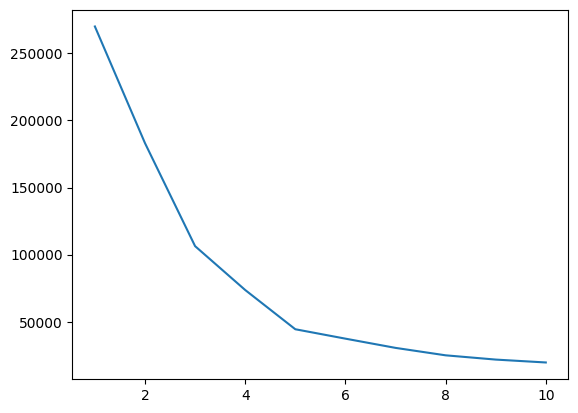

In [27]:
plt.plot(range(1, 11), WCSS)

In [28]:
model = KMeans(n_clusters= 5)
model.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [29]:
y = model.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
print(y)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 4 0 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 1 2 4 2 1 2 1 2 4 2 1 2 1 2 1 2 1 2 4 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


# visualizing the final results

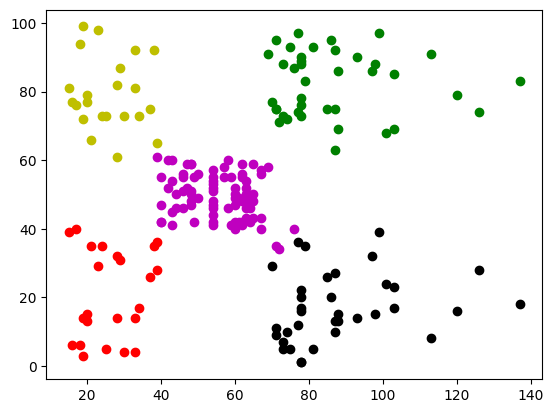

In [34]:
plt.scatter(x.iloc[y == 0, 0], x.iloc[y == 0, 1], c='red')
plt.scatter(x.iloc[y == 1, 0], x.iloc[y == 1, 1], c='black')
plt.scatter(x.iloc[y == 2, 0], x.iloc[y == 2, 1], c='g')
plt.scatter(x.iloc[y == 3, 0], x.iloc[y == 3, 1], c='y')
plt.scatter(x.iloc[y == 4, 0], x.iloc[y == 4, 1], c='m')
plt.show()

# deployment

In [37]:
income = int(input("enter your income: "))
spending = int(input("enter your spending score: "))
new_point = [[income, spending]]
your_group = model.predict(new_point)
print(your_group)

enter your income: 10
enter your spending score: 30
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
